In [8]:
from coba.benchmarks import Result
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [24.0, 12.0]
! pip list | grep coba

In [ ]:
result = Result.from_transaction_log('benchmark_long.log')
print(result)
result.standard_plot(show_err=True)

{'Learners': 4, 'Simulations': 42, 'Batches': 111888}


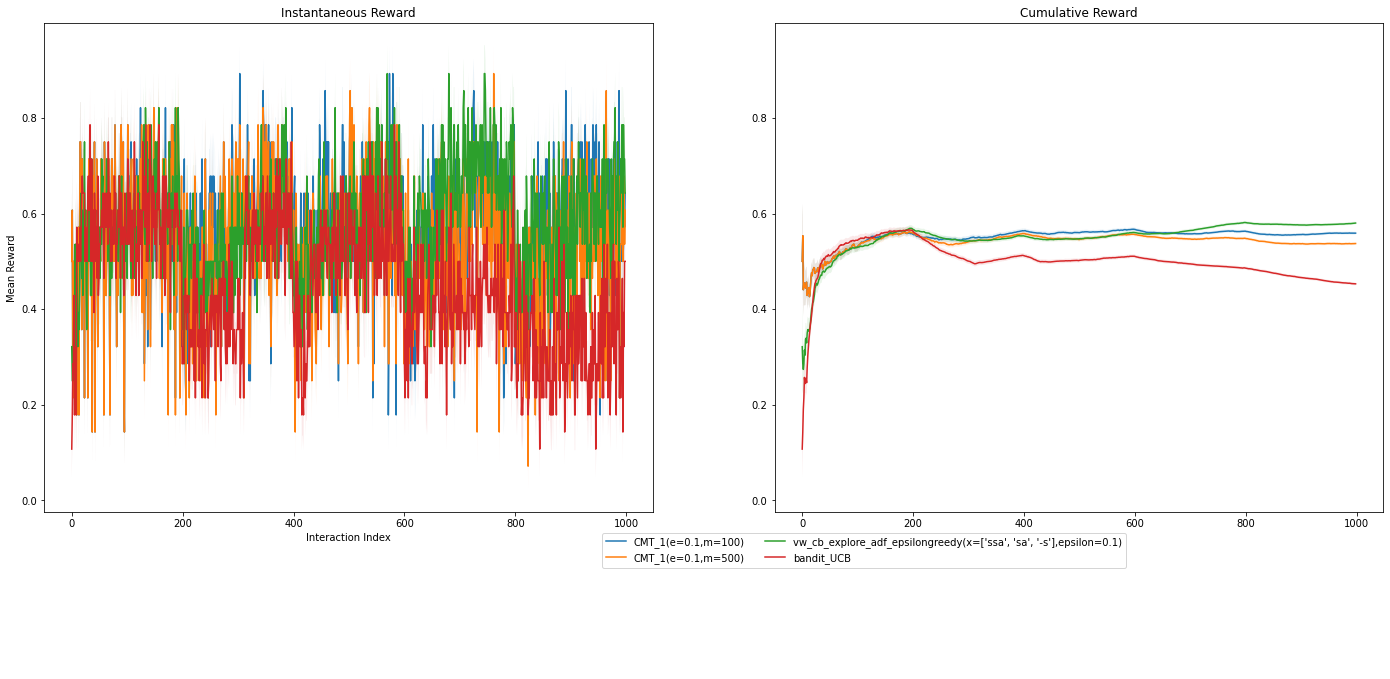

In [118]:
result = Result.from_transaction_log('benchmark_longish.log')
print(result)
result.standard_plot(show_err=True)

In [117]:
l,s,b = result.to_pandas()
l

,learner_id,family,full_name,e,m,x,epsilon
0,0,CMT_1,"CMT_1(e=0.1,m=100)",0.1,100.0,NaN,NaN
1,1,CMT_1,"CMT_1(e=0.1,m=500)",0.1,500.0,NaN,NaN
2,2,vw_cb_explore_adf_epsilongreedy,"vw_cb_explore_adf_epsilongreedy(x=['ssa', 'sa'...",NaN,NaN,"[ssa, sa, -s]",0.1
3,3,bandit_UCB,bandit_UCB,NaN,NaN,NaN,NaN


/home/pmineiro/miniconda3/envs/memory/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


0.015111711029099278 * x + 0.040772915772915794


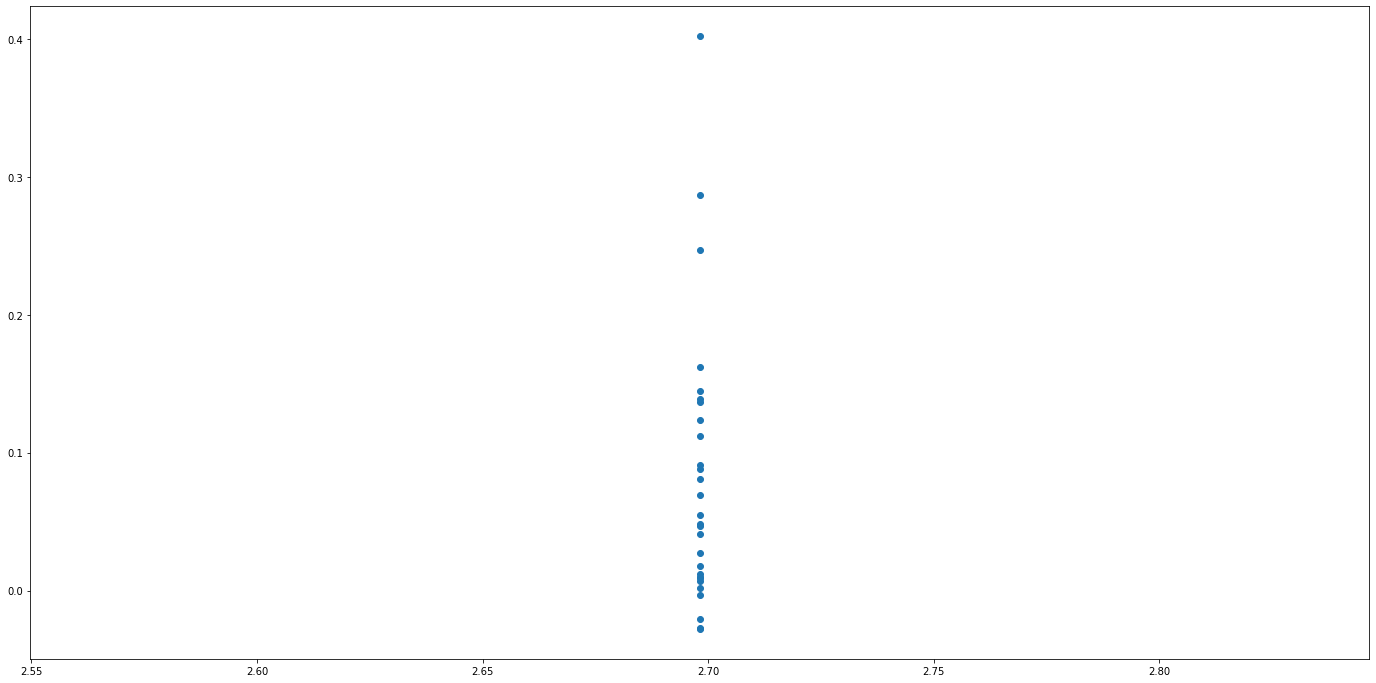

In [109]:
mega = b.groupby(['learner_id', 'simulation_id'], as_index=False).mean('reward')
ultra = pd.merge(mega[mega.learner_id == 1], mega[mega.learner_id == 2], on='simulation_id')
ultra['reward_diff'] = ultra.reward_y - ultra.reward_x
ultra['log10size'] = np.log10(ultra['batch_index_x'])
plt.scatter(x=ultra['log10size'], y=ultra['reward_diff'])
linfit = np.polyfit(x=ultra['log10size'], y=ultra['reward_diff'], deg=1)
plt.plot(ultra['log10size'], [linfit[0]*x + linfit[1] for x in ultra['log10size']], linestyle='dashed', color='orange')
# plt.figure()
# plt.hist(ultra['reward_diff'], bins='auto')
print(f'{linfit[0]} * x + {linfit[1]}')

-0.07522282943228373 * x + 0.0986892265473658


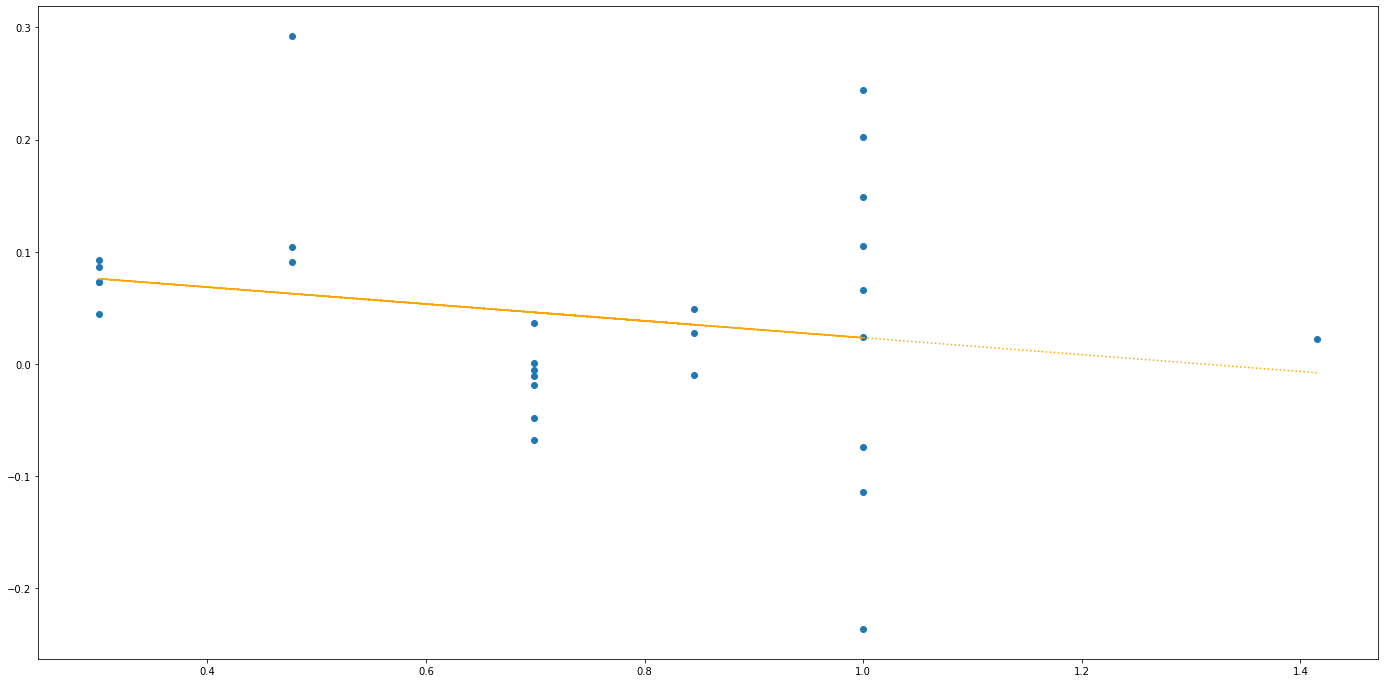

In [115]:
mega = pd.merge(b.groupby(['learner_id', 'simulation_id'], as_index=False).mean('reward'), s, on='simulation_id')
ultra = pd.merge(mega[mega.learner_id == 1], mega[mega.learner_id == 2], on='simulation_id')
ultra['reward_diff'] = ultra.reward_y - ultra.reward_x
ultra['logaction'] = np.log10(ultra['action_count_x'])
plt.scatter(x=ultra['logaction'], y=ultra['reward_diff'])
linfit = np.polyfit(x=ultra['logaction'], y=ultra['reward_diff'], deg=1)
plt.plot(ultra['logaction'], [linfit[0]*x + linfit[1] for x in ultra['logaction']], linestyle='dotted', color='orange')
print(f'{linfit[0]} * x + {linfit[1]}')